## 주성분 분석

In [6]:
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1 , 100*100)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [9]:
pca.components_.shape

(50, 10000)

In [10]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

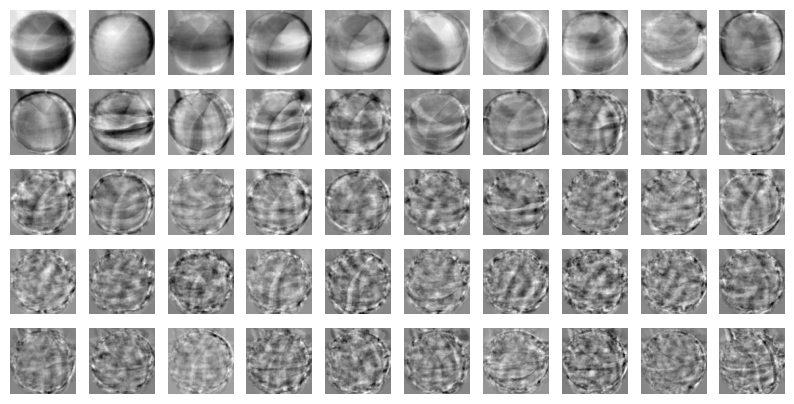

In [11]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [13]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

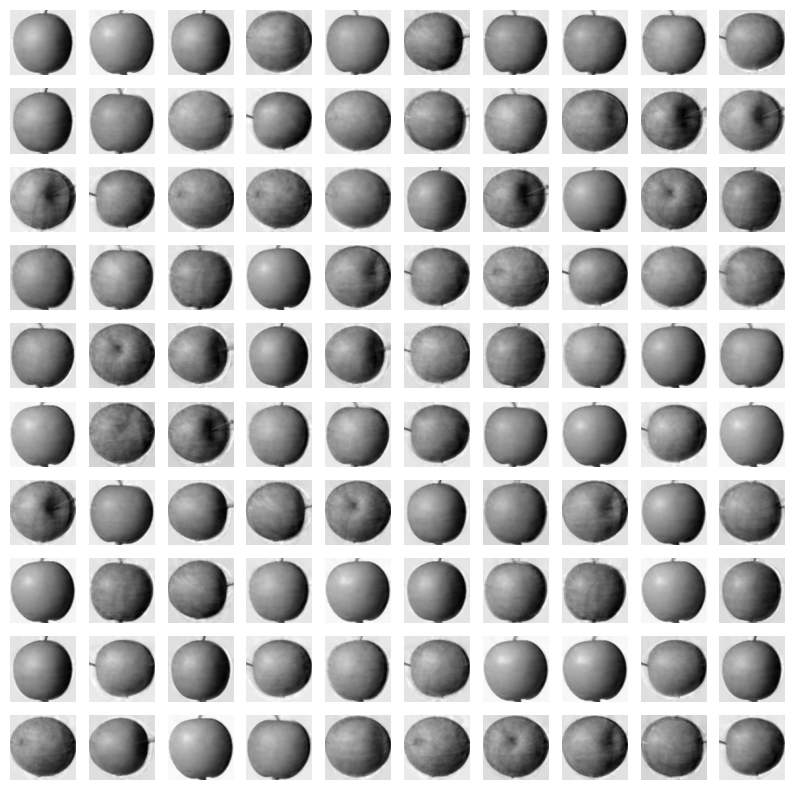

In [17]:
fruits_inverse = pca.inverse_transform(fruits_pca)
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[:100])

In [20]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511201, 0.00486383, 0.00480347,
       0.00447836, 0.00437316, 0.00408037, 0.00389476, 0.00372442,
       0.00359292, 0.00331473, 0.00317773, 0.00304338, 0.00303765,
       0.00288866, 0.0027584 , 0.00264963, 0.00255878, 0.00251951,
       0.002474  , 0.00239545, 0.00230664, 0.00221089, 0.00216644,
       0.00214074, 0.00196661, 0.00193024, 0.00190288, 0.00185148,
       0.00182734, 0.00173836, 0.00167701, 0.00163622, 0.00159946])

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)

In [22]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(scores)

{'fit_time': array([0.14840388, 0.14228249, 0.13520384, 0.12825155, 0.13316488]), 'score_time': array([0.00191307, 0.00190783, 0.00177836, 0.00183153, 0.00173855]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [23]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.01073408, 0.00678802, 0.00502825, 0.00658536, 0.0127883 ]), 'score_time': array([0.0005374 , 0.00051355, 0.00040364, 0.00045729, 0.00040078]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [24]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.n_components_

np.int64(2)

In [25]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [26]:
scores = cross_validate(lr, fruits_pca, target)
scores

C:\Users\1-02\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\1-02\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'fit_time': array([0.04371953, 0.01680994, 0.01594639, 0.00994015, 0.02003789]),
 'score_time': array([0.00077653, 0.00046301, 0.00040913, 0.00039768, 0.00043464]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

In [27]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [29]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

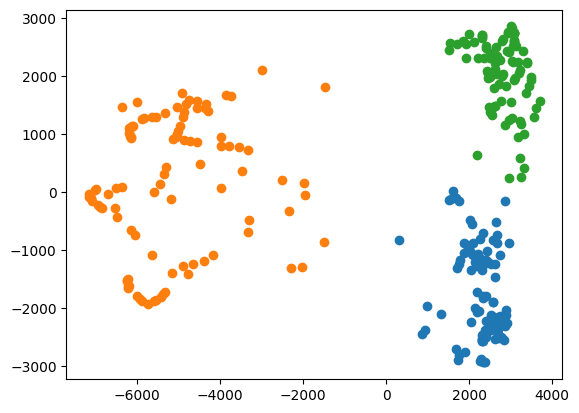

In [42]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])